In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data



In [2]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

TypeError: string indices must be integers

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749
2021-12-30,180.570007,178.089996,179.470001,178.199997,59773000.0,177.973251
2021-12-31,179.229996,177.259995,178.089996,177.570007,64062300.0,177.344055


In [ ]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


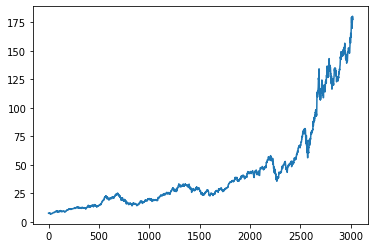

In [ ]:
plt.plot(df.Close) 

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

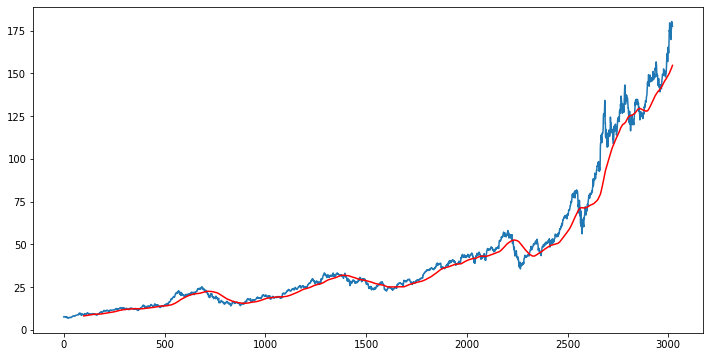

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

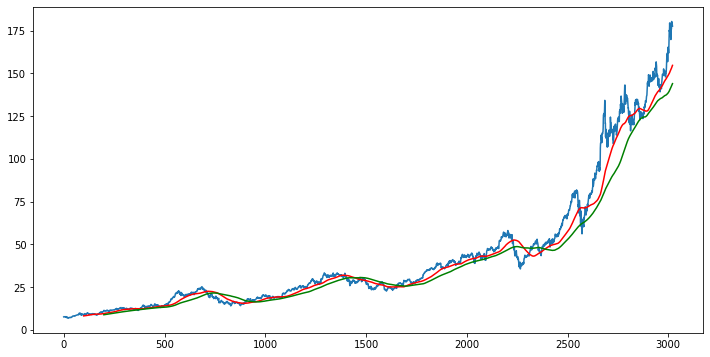

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3022, 5)

In [ ]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.75)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.25): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2266, 1)
(2267, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.62938757],
       [0.63676664],
       [0.63764622]])

In [ ]:
data_training_array.shape

(2266, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train.shape

(2166, 100, 1)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))



model.summary()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [ ]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
2166/2166 [==============================] - 13s 6ms/step - loss: 0.0288
Epoch 2/50
2166/2166 [==============================] - 17s 8ms/step - loss: 0.0059
Epoch 3/50
2166/2166 [==============================] - 13s 6ms/step - loss: 0.0059
Epoch 4/50
2166/2166 [==============================] - 13s 6ms/step - loss: 0.0050
Epoch 5/50
2166/2166 [==============================] - 13s 6ms/step - loss: 0.0049
Epoch 6/50
2166/2166 [==============================] - 13s 6ms/step - loss: 0.0044
Epoch 7/50
2166/2166 [==============================] - 15s 7ms/step - loss: 0.0039
Epoch 8/50
2166/2166 [==============================] - 13s 6ms/step - loss: 0.0040
Epoch 9/50
2166/2166 [==============================] - 12s 6ms/step - loss: 0.0037
Epoch 10/50
2166/2166 [==============================] - 12s 6ms/step - loss: 0.0037
Epoch 11/50
2166/2166 [==============================] - 12s 6ms/step - loss: 0.0033
Epoch 12/50
2166/2166 [==============================] - 13s 6ms/step - l

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
755,19.608213
756,19.360714
757,18.821428
758,18.710714
759,18.761070


In [ ]:
data_training.tail(100)

,Close
2166,52.220001
2167,51.882500
2168,52.217499
2169,52.437500
2170,52.560001
...,...
2261,39.292500
2262,39.037498
2263,39.057499
2264,39.435001


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [ ]:
final_df.head()

,Close
0,52.220001
1,51.882500
2,52.217499
3,52.437500
4,52.560001


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2300272 ],
       [0.22799873],
       [0.23001216],
       ...,
       [0.99429028],
       [0.98719814],
       [0.98341175]])

In [ ]:
input_data.shape

(2367, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2267, 100, 1)
(2267,)


In [ ]:
#Making Predicitons

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(2267, 1)

In [ ]:
y_test

array([0.03402229, 0.03253475, 0.02929351, ..., 0.99429028, 0.98719814,
       0.98341175])

In [ ]:
y_predicted

array([[0.18910575],
       [0.18738317],
       [0.18488002],
       ...,
       [0.9249066 ],
       [0.92699194],
       [0.9299034 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00601025])

In [ ]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

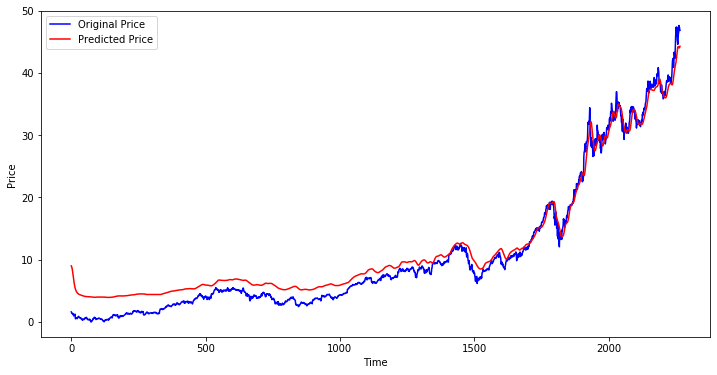

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
valid